# Why Julia?

<div class="alert alert-block alert-info"> 
<h2>Overview</h2>
This notebook will highlight the unique features of Julia which make it such a great language. For example,

- High-level syntax
- Performance
- Multiple dispatch
- Package manager and package ecosystem
- High performance computing
- Interoperability with other languages
</div>

Much of this notebook is parphrased from:
> **Reference**: [Why Julia? A manifesto](https://github.com/Datseris/whyjulia-manifesto/tree/main)

## Julia is Fast

Julia's syntax is human-readable and similar to languages like MATLAB and Python. Despite its high-level nature, Julia compiles code just-in-time ("JIT") using LLVM, which allows it to achieve speeds similar to low-level languages like C. Here are some benchmark results with runtime (referenced against C) of various algorithmic benchmarks compared across languages (from [this page](https://julialang.org/benchmarks/)).

![image.png](https://julialang.org/assets/images/benchmarks.svg)

Julia has just-in-time (JIT) compilation. This means that the code is dynamically compiled during the execution of the program, also known as the program run time. In this way, the previous step of compiling the code into an executable is completely excluded from consideration.

The idea behind JIT compilation is to bring the benefits of both (static) compilation and interpretation.

> **Reference**: [The Julia Compilation Process](https://testsubjector.github.io/blog/2020/03/26/The-Julia-Compilation-Process)

Julia is (or at least can be) fast because of how it is designed. Many choices went into this design, but the core paradigm of multiple dispatch as a way to enable type stability is what many of its high-performance features rely upon, allowing Julia to be very easy for a compiler to make into efficient code, but also allowing the code to be concise/readable and "look like a scripting language". 

## Julia is Composable

One of the most powerful features of Julia is **multiple dispatch**, where functions are chosen based on the types of all arguments, making Julia highly flexible and extensible. Multiple dispatch allows for a language to dispatch function calls onto type-stable functions. This is a key paradigm of Julia, so let's take some time to dig into it. If you have type stability inside of a function (meaning, any function call within the function is also type-stable), then the compiler can know the types of the variables at every step. Therefore, it can compile highly optimized code that runs just as fast as C or Fortran. Multiple dispatch works into this story because it means that `*` can be a type-stable function: it just means different things for different inputs. But if the compiler can know the types of `a` and `b` before calling `*`, then it knows which `*` method to use, and therefore it knows the output type of `c=a*b`.

 The dispatch system will generally choose the most specific applicable dispatch:

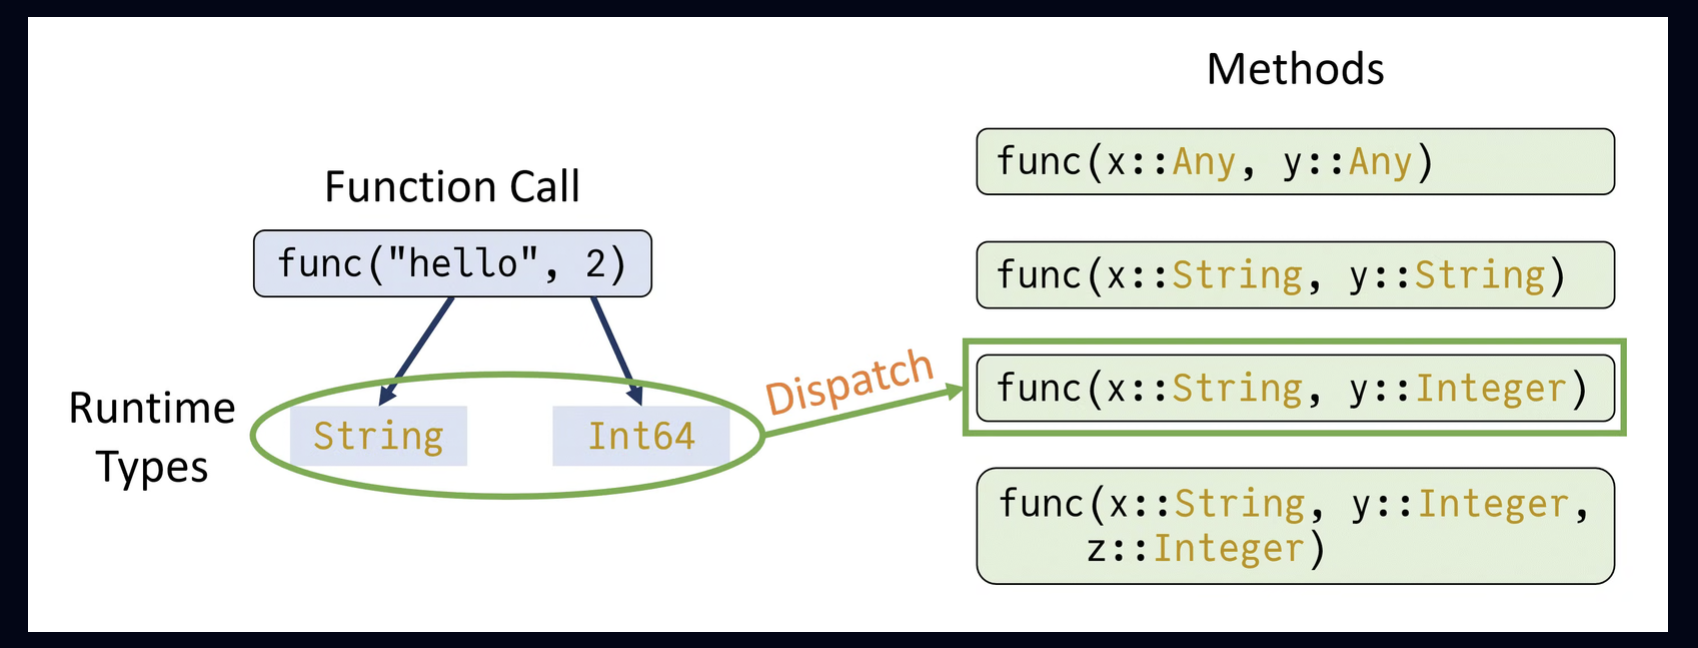

In [ ]:
x = 2 + 3
typeof(x)

Now let's use the `+` operator as an example to illustrate multiple dispatch in Julia.

In [ ]:
x = 2.0 + 3
typeof(x)

#### Example of Multiple Dispatch
Let’s define a simple function that behaves differently based on the types of its arguments.

In [ ]:
# Define functions using multiple dispatch
function add(a::Int, b::Int)
    return a + b
end

Now we define a function with the same name, but to concatenate strings.

In [ ]:
function add(a::String, b::String)
    return a * b # Concatenates strings
end

In [ ]:
# Test multiple dispatch
println(add(3, 4))       # Int addition
println(add("Hello, ", "World!"))  # String concatenation

#### Performance Benefits of Multiple Dispatch

In Julia, multiple dispatch allows highly optimized code paths to be selected at runtime, providing both flexibility and performance.

In [ ]:
# Example of more complex dispatch based on argument types
function process_data(x::Array{Int})
    println("Processing integer array")
end

In [ ]:
function process_data(x::Array{Float64})
    println("Processing float array")
end

In [ ]:
# Test with different types
process_data([1, 2, 3])         # Dispatches to integer array method
process_data([1.1, 2.2, 3.3])   # Dispatches to float array method

#### Custom Interfaces with Multiple Dispatch

We can also use multiple dispatch to define custom interfaces by implementing functions for specific types. Let's see how this works by defining an abstract type called `Shape`:

In [24]:
# Define an abstract type and a concrete subtype
abstract type Shape end

We will work now define composite types for `Circle` and `Square`:

In [25]:
struct Circle <: Shape
    radius::Float64
end

In [26]:
struct Square <: Shape
    side::Float64
end

Let's define a function that calculates the area of a shape using multiple dispatch:

In [ ]:
# Define a generic area function using dispatch
area(s::Circle) = π * s.radius^2
area(s::Square) = s.side^2

Check that the function works as we expect:

In [ ]:
circle = Circle(5.0)
square = Square(4.0)

# Test the area function
println(area(circle))  # Circle with radius 5
println(area(square))  # Square with side 4

Now here are a few examples of the power, expressiveness, and conciseness afforded by the multiple dispatch paradigm:

In [ ]:
area_squared(s::Shape) = area(s)^2
println(area_squared(circle))
println(area_squared(square))

In [ ]:
area.([circle, square])

In Julia, this combination – the idea of a shape (and potentially, though not crucially, a corresponding abstract type) and functions like `area` that dispatch on it – is a very simple example of a powerful idea that is enabled by multiple dispatch: that of an [**interface**](https://docs.julialang.org/en/v1/manual/interfaces/). The core idea of an interface is an informal contract that says, effectively, "if you dispatch these functions on your object, then a bunch of other functionality that depends only on those functions will just work!"

Other interfaces in Julia include:
* [Indexing](https://docs.julialang.org/en/v1/manual/interfaces/#Indexing) and [iteration](https://docs.julialang.org/en/v1/manual/interfaces/#man-interface-iteration), upon which operations like sorting and slicing are built in a generalized way
* [Graphs](https://juliagraphs.org/Graphs.jl/v1.5/) (the mathematical objects with nodes and edges), which allows for functionality like graph traversal, computation of centrality measures, etc. on a wide variety of graph types
* [AtomsBase](https://juliamolsim.github.io/AtomsBase.jl/stable/), for specifying atomistic system geometries
* [KernelAbstractions](https://github.com/JuliaGPU/KernelAbstractions.jl) for writing GPU kernels which target arbitrary GPU backends (e.g. NVIDIA or AMD)

### Extra: Advantages of Julia Dispatch

**Improved extensibility**: With Multiple Dispatch, it becomes easier to extend functionality by adding new functions or methods that handle specific argument types. This makes it straightforward to accommodate new types without modifying existing code, resulting in better code organization and modularity.

**Avoidance of complex branching and conditionals**: When dealing with different argument types, traditional approaches often involve long chains of if-else or switch-case statements to determine the appropriate action. Multiple dispatch eliminates the need for such complex branching, leading to cleaner, more readable code.

### **Caution**: Method Ambiguity

A "gotcha" that can happen is if there is not one clear "most specific" method upon which to dispatch (see example below). This situation should be avoided as it will generally lead to errors.

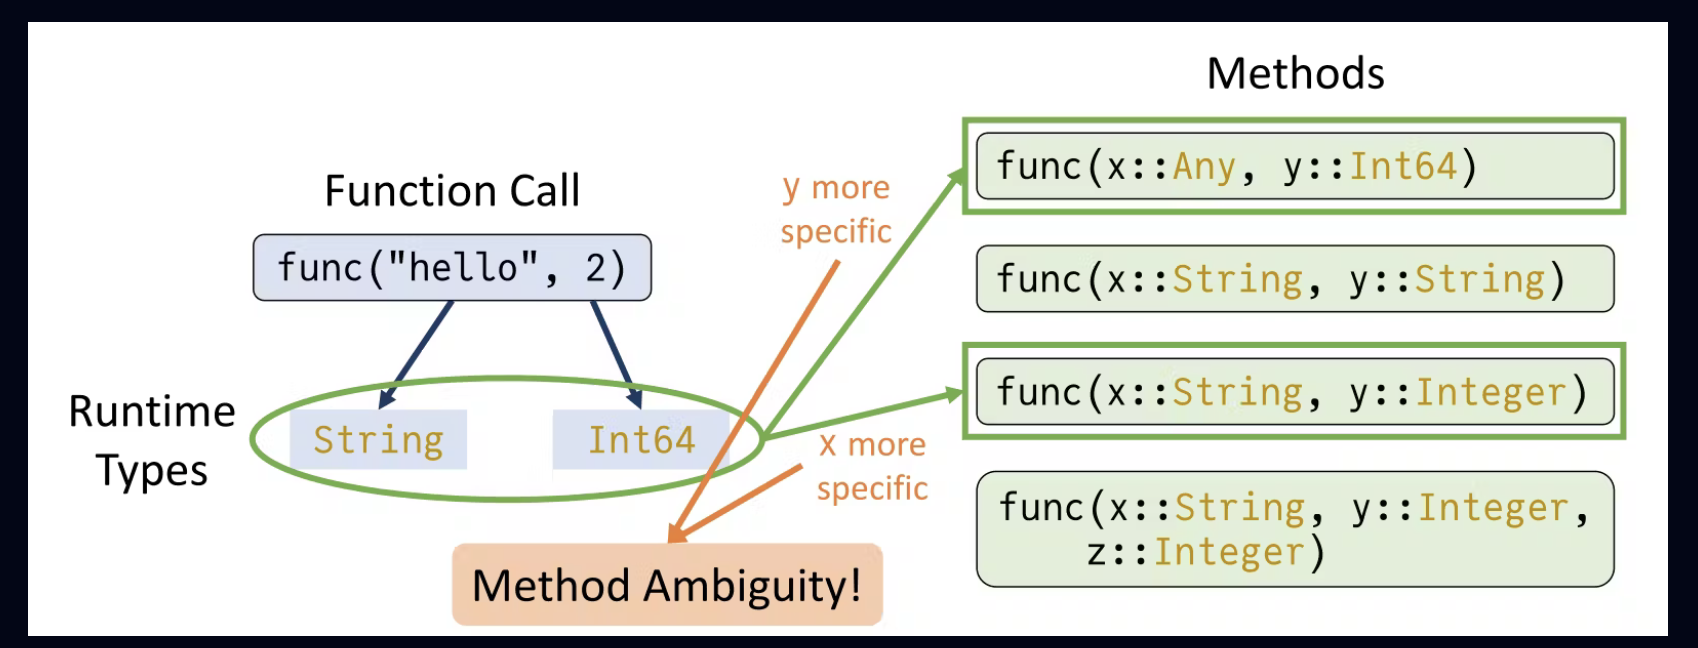

> **Reference**: [More about multiple dispatch](https://blog.glcs.io/multiple-dispatch)

## Julia has a Package for That

Julia’s built-in package manager, [Pkg](https://docs.julialang.org/en/v1/stdlib/Pkg), powers a vibrant and composable ecosystem where packages can depend on and extend each other with minimal friction. Whether you're combining differential-equation solvers, machine-learning libraries, or GPU-accelerated tools, everything "just works" together. Unlike other package managers, once you’ve defined a Julia environment Pkg will faithfully reproduce the exact same versions and setup—even if you return months later.

## Julia Works with Your Other Codes

Julia has the ability to call and be called from many languages. Some notable examples and their related packages are:

- Python --> [PythonCall.jl](https://github.com/JuliaPy/PythonCall.jl), [PyCall.jl](https://github.com/JuliaPy/PyCall.jl),  [CondaPkg.jl](https://github.com/JuliaPy/CondaPkg.jl)
- C --> Native to Julia, [docs](https://docs.julialang.org/en/v1/manual/calling-c-and-fortran-code/)
- Fortran --> Native to Julia, [docs](https://docs.julialang.org/en/v1/manual/calling-c-and-fortran-code/)
- C++ --> [CxxWrap.jl](https://github.com/JuliaInterop/CxxWrap.jl)
- R --> [RCall.jl](https://github.com/JuliaInterop/RCall.jl)
- MATLAB --> [MATLAB.jl](https://github.com/JuliaInterop/MATLAB.jl)

Thanks to this strong interoperability, the Julia community has built up a special package registry, [Yggdrasil.jl](https://github.com/JuliaPackaging/Yggdrasil), with over 1000 pre-built binaries that are trivial to call from Julia. These library wrappers, called JLLs (Julia Link Library), contain a build script which is run (beforehand) in a cross-compilation environment allowing you to download a library on whatever platform you run, wheter it be ARM Linux, Windows x86 or something else.

These wrappers make it easy to call compiled libraries, and oftentimes someone has already done the work to wrap the library. For example, many powerful packages in Julia are made possible by Yggdrasil. For example,

- [CUDA.jl](https://github.com/JuliaGPU/CUDA.jl) (and other GPU backends)
- [LinearAlgebra.jl](https://github.com/JuliaLang/LinearAlgebra.jl/tree/master)
- [MPI.jl](https://github.com/JuliaParallel/MPI.jl)
- [HDF5.jl](https://github.com/JuliaIO/HDF5.jl)
- [QML.jl](https://github.com/JuliaGraphics/QML.jl)
- [FFTW.jl](https://github.com/JuliaMath/FFTW.jl)
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl)


## Julia Scales on Supercomputers

Thanks to Julia's type system, multiple-dispatch, and the rich ecosystem of external libraries there are dozens of fantastic libraries in Julia's Base library and package ecosystem that can take you code form 1 core to hundreds or from CPU to GPU.

Julia ships with the [Threads](https://docs.julialang.org/en/v1/base/multi-threading/#Base.Threads.nthreads) and [Distributed](https://docs.julialang.org/en/v1/stdlib/Distributed/) libraries. These contain convenient functions such as `Threads.@threads` which can convert any for loop into a parallel for loop. The `Distributed` library enables multi-process communication natively in Julia with the ability to add and communicate between processes. 

Building on these libraries, the Julia community has created many exceptional libraries for HPC. With the power of multiple dispatch, we can perform many operations on the GPU just by changing the type of our data from `Array` to `CuArray` (or the analagous type for AMD, Intel, or Apple). Most of the common array operations (e.g. broadcasting, matrix multiplication, unary functions) are all supported! 

```julia
cu_C = CUDA.rand(5)
sum_of_C = sum(cu_C)
```


These libraries even allow you to write GPU kernels natively in Julia, no more C/C++!!

```julia
function my_kernel(a)
    i = threadIdx().x
    a[i] = 42
    return
end

a = CuArray{Int}(undef, 5);

@cuda threads=length(a) my_kernel(a);
```


Useful libraries:
- [MPI.jl](https://github.com/JuliaParallel/MPI.jl): Julia interface to MPI, akin to mpi4py from python.
- [Dagger.jl](https://github.com/JuliaParallel/Dagger.jl): Parallel computing framework for writing distributed programs on CPU and GPU
- [CUDA.jl](https://github.com/JuliaGPU/CUDA.jl): Wrappers for the CUDA toolkit (e.g. cuBLAS, cuTENSOR), driver and runtime. 
- [AMDGPU.jl](https://github.com/JuliaGPU/AMDGPU.jl): Wrappers for ROCM libraries
- [oneAPI.jl](https://github.com/JuliaGPU/oneAPI.jl): Work with the oneAPI unified programming model
- [Metal.jl](https://github.com/JuliaGPU/Metal.jl): Program GPUs on macOS
- [KernelAbstractions.jl](https://github.com/JuliaGPU/KernelAbstractions.jl): Write generic GPU kernels which are backend agnostic.
- [OhMyThreads.jl](https://github.com/JuliaFolds2/OhMyThreads.jl): What Threads.jl wishes it was
- [Polyester.jl](https://github.com/JuliaSIMD/Polyester.jl): Lightweight threads
- [ImplicitGlobalGrid.jl](https://github.com/eth-cscs/ImplicitGlobalGrid.jl): Massively parallel stencil based PDE solver, with support for CUDA and ROCm, that can scale across thousands of GPUs/CPUs
- [ThreadPinning.jl](https://github.com/carstenbauer/ThreadPinning.jl): Pin Julia thread to CPU (hardware) threads
- [DiffEqGPU.jl](https://github.com/SciML/DiffEqGPU.jl): Solve differential equations on CUDA, ROCm, OneAPI and Metal. Solves ensemble problems on multiple GPUs.

## Julia's Community

The Julia community is incredibly inviting, eager to help and easy to access. Find all the ways to interact with Julia at the [community](https://julialang.org/community/) page. The most common methods are:

- The Julia [Slack](https://julialang.org/slack/) is the best place to go for quick questions. There are channels for general help, as well as specific channels for sub-commuinities (e.g., GPUs).

- The Julia [Discourse](https://discourse.julialang.org/) is the best place to go for longer questions or if you want you question/answer to not get deleted after a few months. 

- The [Julia YouTube](https://www.youtube.com/c/TheJuliaLanguage) channel hosts all the talks from past JuliaCon's as well as other Julia related conferences.